In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data/data_fe.csv")
data

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,1/1/00,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,1/1/00,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28220,28211.0,"Robinson ""DJ Styles"" Lazard",NaN,Male,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,6/7/20,NW 135th St & NW 22nd Ave,...,Vehicle,Miami-Dade police were chasing a white Dodge C...,Pending investigation,https://www.local10.com/news/local/2020/06/08/...,No,NaN,6/7/2020: Miami-Dade police were chasing a whi...,NaN,28211.0,2020
28221,28213.0,Donald L. Hunter,39,Male,Race unspecified,NaN,NaN,NaN,6/7/20,I-49,...,Gunshot,"Bridgett L. Burriss, 40, was abducted and when...",Pending investigation,https://www.kmbc.com/article/bates-county-miss...,No,NaN,"6/7/2020: Bridgett L. Burriss, 40, was abducte...",NaN,28213.0,2020
28222,28214.0,Name withheld by police,NaN,Female,Race unspecified,NaN,NaN,NaN,6/7/20,Bell Drive and Afton Way,...,Vehicle,"About 4:40 a.m., Smyrna police officers respon...",Pending investigation,https://www.mdjonline.com/news/police-man-flee...,No,NaN,"6/7/2020: About 4:40 a.m., Smyrna police offic...",NaN,28214.0,2020
28223,28215.0,Name withheld by police,81,Male,Race unspecified,NaN,NaN,NaN,6/8/20,900 block N. Tornillo Street,...,Gunshot,Officers responded to a report of a man with s...,Pending investigation,https://kvia.com/news/crime/2020/06/08/swat-st...,Yes,NaN,6/8/2020: Officers responded to a report of a ...,NaN,28215.0,2020


In [3]:
data.columns = data.columns.str.replace("'"," ")
data

,Unique ID,Subject s name,Subject s age,Subject s gender,Subject s race,Subject s race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,1/1/00,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,1/1/00,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28220,28211.0,"Robinson ""DJ Styles"" Lazard",NaN,Male,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,6/7/20,NW 135th St & NW 22nd Ave,...,Vehicle,Miami-Dade police were chasing a white Dodge C...,Pending investigation,https://www.local10.com/news/local/2020/06/08/...,No,NaN,6/7/2020: Miami-Dade police were chasing a whi...,NaN,28211.0,2020
28221,28213.0,Donald L. Hunter,39,Male,Race unspecified,NaN,NaN,NaN,6/7/20,I-49,...,Gunshot,"Bridgett L. Burriss, 40, was abducted and when...",Pending investigation,https://www.kmbc.com/article/bates-county-miss...,No,NaN,"6/7/2020: Bridgett L. Burriss, 40, was abducte...",NaN,28213.0,2020
28222,28214.0,Name withheld by police,NaN,Female,Race unspecified,NaN,NaN,NaN,6/7/20,Bell Drive and Afton Way,...,Vehicle,"About 4:40 a.m., Smyrna police officers respon...",Pending investigation,https://www.mdjonline.com/news/police-man-flee...,No,NaN,"6/7/2020: About 4:40 a.m., Smyrna police offic...",NaN,28214.0,2020
28223,28215.0,Name withheld by police,81,Male,Race unspecified,NaN,NaN,NaN,6/8/20,900 block N. Tornillo Street,...,Gunshot,Officers responded to a report of a man with s...,Pending investigation,https://kvia.com/news/crime/2020/06/08/swat-st...,Yes,NaN,6/8/2020: Officers responded to a report of a ...,NaN,28215.0,2020


In [4]:
data = data.rename(columns={'Subject s name':"Name",
                            'Subject s age':"Age", 
                            'Subject s race':"Race",
                            'Subject s gender':"Sex",
                            "Date (Year)": "Year"})
data.head()

,Unique ID,Name,Age,Sex,Race,Subject s race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Year
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
2,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,1/1/00,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,1/1/00,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000


In [12]:
year_groupby = data.groupby(['Year'])
year_count = year_groupby['Unique identifier (redundant)'].count().reset_index(name = 'Total Number of Killings')
year_count = year_count.drop([0, 1, 23])
year_count = year_count.reset_index()

In [13]:
year_count = year_count.drop(['index'], axis=1)
year_count

,Year,Total Number of Killings
0,2000,851
1,2001,923
2,2002,986
3,2003,1052
4,2004,1037
5,2005,1171
6,2006,1269
7,2007,1256
8,2008,1209
9,2009,1257


<BarContainer object of 21 artists>

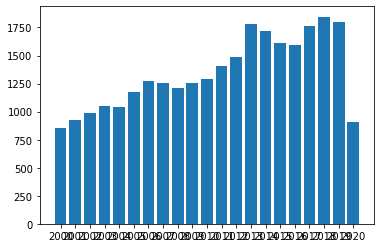

In [7]:
x_axis = year_count['Year']
y_axis = year_count['Number of Killings']
plt.bar(x_axis, y_axis)

In [8]:
blacks = data.loc[data["Race"]=="African-American/Black",:]
blacks

,Unique ID,Name,Age,Sex,Race,Subject s race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Year
0,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
1,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,1/1/00,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
6,25750.0,Billy Jones,30,Male,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,Pollock Street,...,Vehicle,Officer Charles Rowe began pursuing Billie Jon...,Unreported,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25750.0,2000
7,25751.0,Terry Rouse,29,Male,African-American/Black,African-American/Black,not imputed,NaN,1/2/00,Pollock Street,...,Vehicle,Officer Charles Rowe began pursuing Billie Jon...,Unreported,https://docs.google.com/document/d/1G106pI2URB...,No,NaN,1/2/2000: Officer Charles Rowe began pursuing ...,NaN,25751.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28188,28188.0,Alazae Jeffrey,19,Female,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,6/2/20,1466 Alamo Dr,...,Vehicle,"Jaiah Metcalf, 21, and Alazae Jeffrey, 19, wer...",Pending investigation,https://www.mercurynews.com/2020/06/03/two-wom...,No,NaN,"6/2/2020: Jaiah Metcalf, 21, and Alazae Jeffre...",NaN,28188.0,2020
28190,28206.0,Tiffany Alexis Eubanks,33,Female,African-American/Black,African-American/Black,not imputed,NaN,6/2/20,1300 N 1st St,...,Asphyxiated/Restrained,Tiffany Eubanks reportedly became combative wh...,Pending investigation,https://www.yakimaherald.com/news/local/homele...,Yes,NaN,6/2/2020: Tiffany Eubanks reportedly became co...,NaN,28206.0,2020
28207,28201.0,Kamal Flowers,24,Male,African-American/Black,African-American/Black,not imputed,NaN,6/5/20,Potter Avenue and Pierce Street,...,Gunshot,Two officers made a traffic stop at 11 p.m. A ...,NaN,https://www.lohud.com/story/news/local/westche...,No,NaN,6/5/2020: Two officers made a traffic stop at ...,NaN,28201.0,2020
28219,28210.0,"Edmon ""DJ Boogie"" McCoy",NaN,Male,African-American/Black,African-American/Black,not imputed,https://fatalencounters.org/wp-content/uploads...,6/7/20,NW 135th St & NW 22nd Ave,...,Vehicle,Miami-Dade police were chasing a white Dodge C...,Pending investigation,https://www.local10.com/news/local/2020/06/08/...,No,NaN,6/7/2020: Miami-Dade police were chasing a whi...,NaN,28210.0,2020


In [11]:
year_groupby_black = blacks.groupby(['Year'])
year_count_black = year_groupby_black['Unique identifier (redundant)'].count().reset_index(name = 'Number of Killings - Blacks')
year_count_black = year_count_black.drop([0, 1])
year_count_black = year_count_black.reset_index()
year_count_black = year_count_black.drop(['index'], axis=1)
year_count_black

,Year,Number of Killings - Blacks
0,2000,121
1,2001,92
2,2002,126
3,2003,158
4,2004,139
5,2005,173
6,2006,211
7,2007,207
8,2008,225
9,2009,262


In [31]:
caucasian = data.loc[data["Race"]=="European-American/White",:]


In [33]:
year_groupby_white = caucasian.groupby(['Year'])
year_count_white = year_groupby_white['Unique identifier (redundant)'].count().reset_index(name = 'Number of Killings - Caucasians')
year_count_white = year_count_white.drop([0, 1])
year_count_white = year_count_white.reset_index()
year_count_white = year_count_white.drop(['index'], axis=1)
year_count_white

,Year,Number of Killings - Caucasians
0,2001,117
1,2002,138
2,2003,153
3,2004,173
4,2005,246
5,2006,273
6,2007,297
7,2008,277
8,2009,369
9,2010,446


In [35]:
# merge total with blacks
merge_table = pd.merge(year_count, year_count_black, on="Year", how="outer")
# add % blacks
merge_table["% Blacks Killed"] = round((merge_table["Number of Killings - Blacks"]/merge_table['Total Number of Killings'])*100)
merge_table

,Year,Total Number of Killings,Number of Killings - Blacks,% Blacks Killed
0,2000,851,121,14.0
1,2001,923,92,10.0
2,2002,986,126,13.0
3,2003,1052,158,15.0
4,2004,1037,139,13.0
5,2005,1171,173,15.0
6,2006,1269,211,17.0
7,2007,1256,207,16.0
8,2008,1209,225,19.0
9,2009,1257,262,21.0


In [36]:
# merge with caucasians
merge_table = pd.merge(merge_table, year_count_white, on="Year", how="outer")
# add % caucasians
merge_table["% Caucasians Killed"] = round((merge_table["Number of Killings - Caucasians"]/merge_table['Total Number of Killings'])*100)
merge_table

,Year,Total Number of Killings,Number of Killings - Blacks,% Blacks Killed,Number of Killings - Caucasians,% Caucasians Killed
0,2000,851,121,14.0,NaN,NaN
1,2001,923,92,10.0,117.0,13.0
2,2002,986,126,13.0,138.0,14.0
3,2003,1052,158,15.0,153.0,15.0
4,2004,1037,139,13.0,173.0,17.0
5,2005,1171,173,15.0,246.0,21.0
6,2006,1269,211,17.0,273.0,22.0
7,2007,1256,207,16.0,297.0,24.0
8,2008,1209,225,19.0,277.0,23.0
9,2009,1257,262,21.0,369.0,29.0


<BarContainer object of 21 artists>

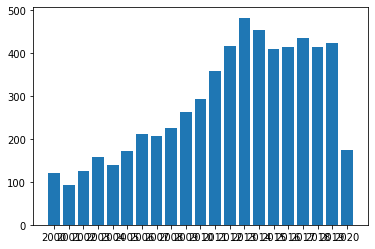

In [16]:
y_axis2=merge_table['Number of Killings - Blacks']
plt.bar(x_axis,  y_axis2)

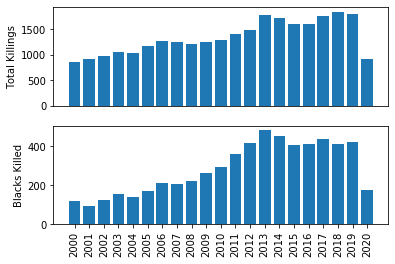

In [26]:
x = range(21)
plt.subplot(2,1,1)
total = plt.bar(x_axis, y_axis)
plt.ylabel('Total Killings')
plt.xticks([],[])

plt.subplot(2,1,2)
black_graph = plt.bar(x_axis, y_axis2)
plt.ylabel('Blacks Killed')
plt.xticks(x_axis, rotation = 'vertical')

plt.show()

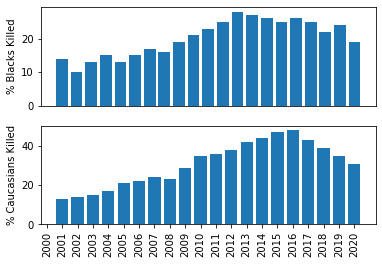

In [37]:


x2 = range(21)
plt.subplot(2,1,1)
perc_black = plt.bar(x_axis, merge_table["% Blacks Killed"])
plt.ylabel('% Blacks Killed')
plt.xticks([],[])

plt.subplot(2,1,2)
perc_white = plt.bar(x_axis, merge_table["% Caucasians Killed"])
plt.ylabel('% Caucasians Killed')
plt.xticks(x_axis, rotation = 'vertical')

plt.show()